In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ridgeRegression import *
from diffevol import *
import openbabel as ob
from moleculToVector import *
from thetas import *

/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
structs = read_dataset('test-Olesya/11_cis-pos-1.xyz')
# structs = read_dataset('test-Olesya/11_cis-pos-1.xyz') + read_dataset('test-Olesya/11_cis-pos-1_1.xyz')
struct_description, amber_coeffs = get_struct_description()
dataset = get_dataset(structs, struct_description)
thetas = get_initial_thetas()

In [4]:
structs_with_forces = read_dataset('forces/gphase/t-1/11_cis-pos-1.xyz', 'forces/gphase/t-1/forces')
structs_with_forces = structs_with_forces[:1000]

In [8]:
struct_description, amber_coeffs = get_struct_description()
dataset = get_dataset(structs_with_forces, struct_description)
thetas = get_initial_thetas()

In [11]:
N = dataset.bonds_matrix.shape[1] + dataset.angles_matrix.shape[1] + dataset.torsions_matrix.shape[1] + dataset.pairs_matrix.shape[1] + len(struct_description.atoms) + 1
HH, std = constrHH(dataset_with_description[0], dataset_with_description[1], np.ones(N))

KeyboardInterrupt: 

In [5]:
y = np.array([struct.energy for struct in structs])

In [12]:
# dataset = dataset_with_description
de = DE(dataset, struct_description, y)
N = dataset.bonds_matrix.shape[1] + dataset.angles_matrix.shape[1] + dataset.torsions_matrix.shape[1] + dataset.pairs_matrix.shape[1] + len(struct_description.atoms) + 1
de.run(N, 10)

525.7471161558544
501.5144426170654
315.5460482376598
315.5460482376598
315.5460482376598
265.80751330959924
114.99663920849318
114.99663920849318
69.9277718907353
35.991840434954
33.278823519820286
22.736372073194882
11.828821415336904
11.828821415336904
11.828821415336904
10.878770367180973
8.815532393703153
7.816091046974558
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.595630275146705
5.436799721110078
5.295281061155782
5.283167542500129
5.283167542500129
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.9143685478562285
4.610354313576931
4.610354313576931
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288455737028
4.325288

KeyboardInterrupt: 

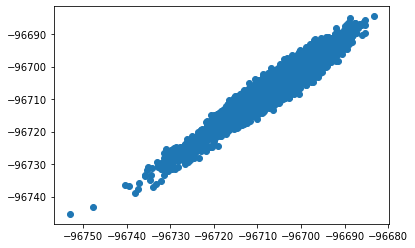

In [14]:
H, stdH = constrH(dataset, struct_description, de.best_p[1:])
# y = np.array([struct[2] for struct in structs])
y = np.array([struct.energy for struct in structs])
l = de.best_p[0]
C, y_est = RidgeRegression(H, y, l)
plt.scatter(y, y_est)

In [13]:
np.corrcoef(y, y_est)

array([[1.        , 0.95382606],
       [0.95382606, 1.        ]])

In [11]:
for i, j in zip(thetas, de.best_p):
    print(i, j)

1.09 6.403701465983985e-05
1.09 13.583652248714767
1.09 7.822895487574751
1.09 1.8641948117476537
1.526 0.6553234247718844
1.09 1.9467042668163828
1.09 0.423209723754101
1.09 0.7665676748091335
1.526 2.163044654986168
1.526 50.31414601680875
1.09 14.06654973503728
1.09 0.5265540715050501
1.51 5.129742516075391
1.51 29.024856561480686
1.09 0.5494837831223888
1.471 5.641850263419495
1.09 3.394199728071455
1.08 3.781153267638276
1.51 0.42193676088484816
1.09 4.356786879693626
1.09 1.267518500777257
1.34 0.8210713706730741
1.4 5.098251130429926
1.09 1.0514905385815247
1.471 18.74963355949858
1.08 1.8488799835584524
1.09 0.8400043558303786
1.34 0.68084455518829
1.34 1.1855120965389732
1.09 63.19401701397476
1.08 0.08602031677502014
1.526 0.5289535884370798
1.09 0.41887364698635876
1.08 0.647114906728737
1.09 0.8297086235366853
1.09 1.0885995672743751
1.4 1.1131957942514845
1.4 0.14202864500145146
1.4 3.965412882528716
1.4 6.0806660617809385
1.08 19.159121983363423
1.4 4.780546944884614
1.4 

In [9]:
thetas = amber_coeffs.bonds_zero_values + amber_coeffs.angles_zero_values + amber_coeffs.torsions_zero_phase + amber_coeffs.rmins + amber_coeffs.qs

In [11]:
H, stdH = constrH(dataset, struct_description, thetas)

In [7]:
linear_coeffs = amber_coeffs.bonds_linear_coeffs + amber_coeffs.angles_linear_coeffs + amber_coeffs.torsions_linear_coeffs +  amber_coeffs.epsilons + [138.935485 * 0.0239006] * len(struct_description.pairs)

In [12]:
y_est = H.dot(linear_coeffs)

In [15]:
# H[:, :len(amber_coeffs[0])].shape, amber_coeffs[0]
kb = len(amber_coeffs.bonds_linear_coeffs)
ka = len(amber_coeffs.angles_linear_coeffs)
kt = len(amber_coeffs.torsions_linear_coeffs)
kq = len(amber_coeffs.epsilons)
keps = len(struct_description.pairs)

yest1 = H[:, :kb].dot(amber_coeffs.bonds_linear_coeffs)
yest2 = H[:, kb:ka+kb].dot(amber_coeffs.angles_linear_coeffs)
yest3 = H[:, kb+ka:kb+ka+kt].dot(amber_coeffs.torsions_linear_coeffs)
yest4 = H[:, kb+ka+kt:kb+ka+kt+kq].dot(amber_coeffs.epsilons)
yest5 = H[:, kb+ka+kt+kq:kb+ka+kt+kq+keps].dot([138.935485 * 0.0239006] * len(struct_description.pairs))

print(yest1[0], yest2[0], yest3[0], yest4[0], yest5[0])

9.495553729354238 20.1946032241865 10.581166347610619 -0.4481192627356642 -2.501776894002565


In [17]:
y[0], y_est[0]

(-96753.16495624499, 37.321427144413086)

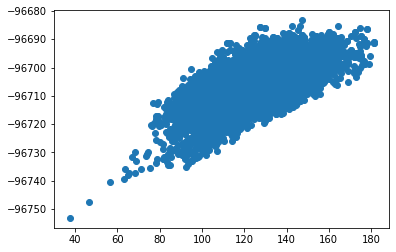

In [13]:
plt.scatter(y_est, y)

Text(0, 0.5, '$LOOCV_{error}$')

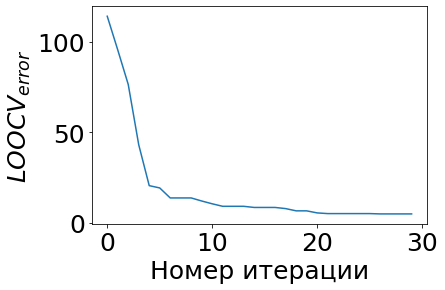

In [9]:
plt.rcParams.update({'font.size': 25})
x = np.array([1143.4, 957.2, 765.9, 432.0, 205.8, 193.1, 137.7, 137.7, 137.7, 120.8, 105.3, 91.4, 91.4, 91.4, 85.1, 85.1, 85.1, 78.7, 66.3, 66.3, 54.9, 
    51.1, 51.1, 51.1, 51.1, 51.1, 49.3, 49.3, 49.3, 49.3]) / 10

plt.plot(x)
plt.xlabel('Номер итерации')
plt.ylabel('$LOOCV_{error}$')